In [1]:
import numpy as np
np.random.seed(42)
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import nltk.stem as stm
from sklearn import metrics
from sklearn.metrics import log_loss,confusion_matrix,classification_report,roc_curve,auc
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split 
import pandas as pd 
import numpy as np

#misc
import gc
import time
import warnings

#stats
from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from PIL import Image

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split





#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

%matplotlib inline

In [50]:
import pandas as pd 
#import ray.dataframe as pd
import xgboost as xgb
import scipy

from scipy.sparse import csr_matrix, hstack

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


In [4]:
from keras.models import Model
from keras.layers import Input, Dense, Embedding, SpatialDropout1D, concatenate
from keras.layers import GRU, Bidirectional, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.preprocessing import text, sequence
from keras.callbacks import Callback


Using TensorFlow backend.


In [5]:
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['OMP_NUM_THREADS'] = '2'


In [6]:
#EMBEDDING_FILE = '/Users/dsg281/Downloads/Embedding_Vectors/FastText/crawl-300d-2M.vec'


In [200]:
train = pd.read_csv('/Users/dsg281/Downloads/Toxic_Comments_Iden/train.csv')
test = pd.read_csv('/Users/dsg281/Downloads/Toxic_Comments_Iden/test.csv')
submission = pd.read_csv('/Users/dsg281/Downloads/Toxic_Comments_Iden/sample_submission.csv')


In [201]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [202]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [203]:
submission.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


In [204]:
print('Total rows in test is',(len(test)))
print('Total rows in train is',(len(train)))


Total rows in test is 153164
Total rows in train is 159571


In [205]:
cols = ['toxic', 'severe_toxic', 'obscene','threat','insult','identity_hate']

In [206]:
data = train[cols]

In [207]:
colormap = plt.cm.afmhot
plt.figure(figsize=(7,7))

/Users/dsg281/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/Users/dsg281/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


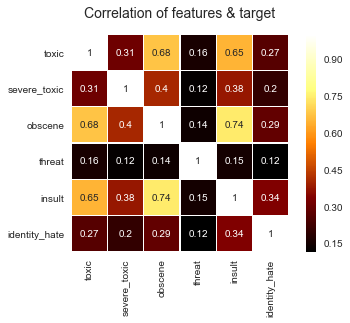

In [208]:
plt.title('Correlation of features & target',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,linecolor='white',annot=True)

In [209]:
len_char_train = train['comment_text'].apply(lambda x: len(str(x)))

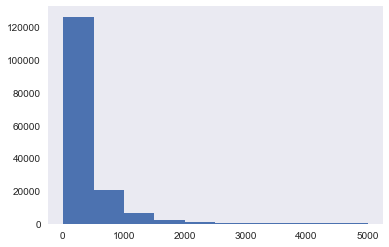

In [210]:
plt.figure()
plt.hist(len_char_train)
plt.show()

In [211]:
merge = pd.concat([train.iloc[:,0:2],test.iloc[:,0:2]])

In [212]:
df= merge.reset_index(drop=True)

## Indirect features

In [213]:
#Count the number of lines in the sentences
df['count_sent'] = df['comment_text'].apply(lambda x : len(re.findall("\n",str(x))))
#Word count in the each comments
df['count_word'] = df['comment_text'].apply(lambda x : len(str(x).split()))
#length of character 
df['lenght_of_char'] = df['comment_text'].apply(lambda x : len(str(x)))
#Unique word count
df['count_unique_word']=df["comment_text"].apply(lambda x: len(set(str(x).split())))
#Number of stopwords
df['num_stopwords'] =df['comment_text'].apply(lambda x: len([w for w in str(x).split() if w in eng_stopwords]))
#Avg lenght of words
df["mean_word_len"] = df["comment_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


In [214]:
#def get_unigrams(que):
#    return [word for word in word_tokenize(que.lower()) if word not in eng_stopwords]
#unigram
#df["unigrams_ques1"] = df['comment_text'].apply(lambda x: get_unigrams(str(x)))


In [215]:
df.head(2)

,id,comment_text,count_sent,count_word,lenght_of_char,count_unique_word,num_stopwords,mean_word_len
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,1,43,264,41,12,5.162791
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,17,112,17,1,5.588235


In [216]:
df.columns

Index(['id', 'comment_text', 'count_sent', 'count_word', 'lenght_of_char',
       'count_unique_word', 'num_stopwords', 'mean_word_len'],
      dtype='object')

In [241]:
train = pd.read_csv('/Users/dsg281/Downloads/Toxic_Comments_Iden/train.csv')
test = pd.read_csv('/Users/dsg281/Downloads/Toxic_Comments_Iden/test.csv')
submission = pd.read_csv('/Users/dsg281/Downloads/Toxic_Comments_Iden/sample_submission.csv')


In [242]:
train = train.fillna("unknown")
test = test.fillna("unknown")
submission = submission.fillna("unknown")

In [243]:
train_mes, valid_mes, train_l, valid_l = train_test_split(train['comment_text'],train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']], test_size=0.2, random_state=2)


In [244]:
train_mes.head()


91312     "\n\nTemplate:Shortcut\n\nOut of curiosity, wh...
86103     I always got the impression he was a real cunt...
17723     Mr. Ebonics\n\nI wanted to apologize for calli...
19418     Alright first of all sorry for my English it s...
118196    "\nAlright, , look at the page now. I've added...
Name: comment_text, dtype: object

In [245]:
valid_mes.head()

57791     In reference to the formula 1-(-1) = 2 you pos...
16982     Sir William Lawrence, 1st Baronet \n\nObviousl...
153739              have some knowledge of this subject.  I
12654     "\n\n Jumper: Griffin's Story \n\nUm... Not su...
57776     "\n\nYou're not helping me, User:Zora. Right n...
Name: comment_text, dtype: object

In [246]:
train_l.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
91312,0,0,0,0,0,0
86103,0,0,1,0,1,0
17723,0,0,0,0,0,0
19418,0,0,0,0,0,0
118196,0,0,0,0,0,0


In [247]:
valid_l.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
57791,0,0,0,0,0,0
16982,0,0,0,0,0,0
153739,0,0,0,0,0,0
12654,0,0,0,0,0,0
57776,0,0,0,0,0,0


In [248]:
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()


In [249]:
transform_com = TfidfVectorizer(ngram_range=(1,3), tokenizer=tokenize,analyzer='word',
                min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
                smooth_idf=1, sublinear_tf=1).fit(train['comment_text'])

In [250]:
comments_train = transform_com.transform(train_mes)
comments_valid = transform_com.transform(valid_mes)
comments_test = transform_com.transform(test['comment_text'])

In [251]:
train_mes = pd.DataFrame(train_mes)
valid_mes = pd.DataFrame(valid_mes)

In [252]:
data = [train_mes, valid_mes, test]

In [253]:
for element in data:
    element['total_length'] = element['comment_text'].apply(len)
    element['capitals'] = element['comment_text'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
    element['caps_vs_length'] = element.apply(lambda row: float(row['capitals'])/float(row['total_length']),
                                axis=1)
    element['num_exclamation_marks'] = element['comment_text'].apply(lambda comment: comment.count('!'))
    element['num_question_marks'] = element['comment_text'].apply(lambda comment: comment.count('?'))
    element['num_punctuation'] = element['comment_text'].apply(lambda comment: sum(comment.count(w) for w in '.,;:'))
    element['num_symbols'] = element['comment_text'].apply(lambda comment: sum(comment.count(w) for w in '*&$%'))
    element['num_words'] = element['comment_text'].apply(lambda comment: len(comment.split()))
    element['num_unique_words'] = element['comment_text'].apply(lambda comment: len(set(w for w in comment.split())))
    element['words_vs_unique'] = element['num_unique_words'] / element['num_words']
    element['num_smilies'] = element['comment_text'].apply(lambda comment: sum(comment.count(w) for w in (':-)', ':)', ';-)', ';)')))

In [254]:
col = ['total_length', 'capitals', 'caps_vs_length',
       'num_exclamation_marks', 'num_question_marks', 'num_punctuation',
       'num_symbols', 'num_words', 'num_unique_words', 'words_vs_unique',
       'num_smilies']

In [255]:
train_mes = scipy.sparse.csr_matrix(train_mes[col].values)
valid_mes = scipy.sparse.csr_matrix(valid_mes[col].values)
test = scipy.sparse.csr_matrix(test[col].values)


In [256]:
import xgboost as xgb

In [257]:
def runXGB(train_X, train_y, test_X, test_y=None, feature_names=None, seed_val=2017, num_rounds=500):
    param = {}
    param['objective'] = 'binary:logistic'
    param['eta'] = 0.1
    param['max_depth'] = 6
    param['silent'] = 1
    param['eval_metric'] = 'auc'
    param['min_child_weight'] = 1
    param['subsample'] = 0.7
    param['colsample_bytree'] = 0.7
    param['seed'] = seed_val
    num_rounds = num_rounds

    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
        model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=20)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain, num_rounds)

    return model 

In [ ]:
col = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
preds = np.zeros((test.shape[0], len(col)))

In [ ]:
for i, j in enumerate(col):
    print('fit '+j)
    model = runXGB(comments_train, train_l[j], comments_valid,valid_l[j])
    preds[:,i] = model.predict(xgb.DMatrix(comments_test), ntree_limit = model.best_ntree_limit)
    gc.collect()

fit toxic
[0]	train-auc:0.668396	test-auc:0.676933
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 20 rounds.
[1]	train-auc:0.711997	test-auc:0.713844
[2]	train-auc:0.793974	test-auc:0.79217
[3]	train-auc:0.835582	test-auc:0.829695
[4]	train-auc:0.838281	test-auc:0.833193
[5]	train-auc:0.850199	test-auc:0.845062
[6]	train-auc:0.852145	test-auc:0.84736
[7]	train-auc:0.852162	test-auc:0.847028
[8]	train-auc:0.860523	test-auc:0.854305
[9]	train-auc:0.867564	test-auc:0.861104
[10]	train-auc:0.873886	test-auc:0.868042
[11]	train-auc:0.878443	test-auc:0.872895
[12]	train-auc:0.886493	test-auc:0.881411
[13]	train-auc:0.891918	test-auc:0.885612
[14]	train-auc:0.896937	test-auc:0.890284
[15]	train-auc:0.898734	test-auc:0.892917
[16]	train-auc:0.90065	test-auc:0.893785
[17]	train-auc:0.901916	test-auc:0.894128
[18]	train-auc:0.902356	test-auc:0.894441
[19]	train-auc:0.905957	test-auc:0.897321
[20]	train-auc:0.90680

In [ ]:
subm = pd.read_csv('/Users/dsg281/Downloads/Toxic_Comments_Iden/sample_submission.csv')
subm = subm.fillna("unknown")

In [ ]:
submid = pd.DataFrame({'id': subm["id"]})


In [ ]:
submission = pd.concat([submid, pd.DataFrame(preds, columns = col)], axis=1)


In [ ]:
submission.to_csv('xgb.csv', index=False)